# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# conda install -c conda-forge scikit_posthocs
!pip install scikit_posthocs

     |████████████████████████████████| 43 kB 718 kB/s 
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
    Preparing wheel metadata ... - done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=e505c6d2df06b72ec230b9aa57dc532a72bb3a4f1a8e4a3fd77708703d1ec57e
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


# Lets define the broad classification of hypothesis test based in the following manner:
1. Continuous (Interval/Ratio)
    - Normality Tests (Shapiro Wilks, Anderson-Darling)
    - One-Sampled (t-test)
    - Two-Sampled
        - Un-paired 
            - Parametric (t-test)
            - Non-parametric (Man-Whitney U)
        - Paired
            - Parametric (t-test)
            - Non-parametric (Wilcoxon-signed-rank test)
    - Three or more sampled
        - Un-paired
            - Parametric (One-Way Anova + Tukey's test)
            - Non-parametric (Kruskal-Wallis + Dunn's test)
        - Paired
            - Non-parametric (Friedman's + Nemenyi test)
2. Categorical (Ordinal/Nominal)
    - Un-paired (Chi-square test)
    - Paired (McNeamar Test)
3. Power Tests : 
    - Power test of one sample and two sample un-paired t test (Power & Min Sample size)
    - Power test of paired two sample un-paired t test (Power & Min Sample size)
    - Power test of one-way unpaired ANOVA (Power & Min Sample size)
4. Multiple Correction Techniques (Bonferroni and Sidak for FWER reduction)

# For certain hypothesis tests, find the from scratch implementations here (to better understand behind the screen) (YTD)

# 1. Tests for continuous/ordinal data 

# Sample data

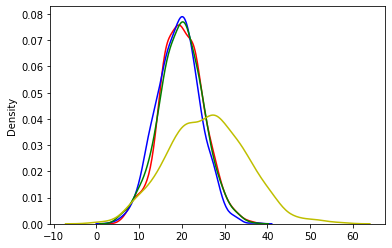

In [3]:
np.random.seed(100) #Seed for reproducible results

distri_norm = np.random.normal(30,5,1000) #mean=30, std dev=5,n=1k

#-----------------------------------------------------------------------------------------
distri_norm_1 = np.random.normal(20,5,1000) #mean=20, std dev=5,n=1000
distri_norm_2 = np.random.normal(18.8,5,1000) #mean=18.8, std dev=5,n=1000
distri_norm_3 = np.random.normal(20,5,700) #mean=20, std dev=5,n=700
distri_norm_4 = np.random.normal(26,9,1000) #mean=26, std dev=9,n=1000
distri_5 = np.random.rand(1,1000).ravel() #mean=13, std dev=9,n=1000  #Non-Normal Distribution


#-----------------------------------------------------------------------------------------

dict_ = {1 : 'r',2 : 'b',
         3 : 'g',4 : 'y',
         5 : 'b'} 

#-----------------------------------------------------------------------------------------
counter = 1
for dist in [distri_norm_1,distri_norm_2,distri_norm_3,distri_norm_4]:
    color_ = dict_[counter]
    sns.distplot(dist,color=color_,hist=False)
    counter += 1

<AxesSubplot:ylabel='Density'>

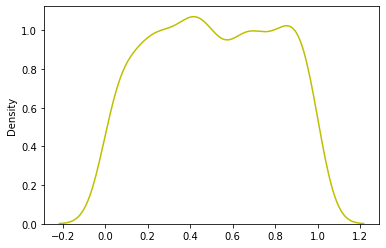

In [4]:
sns.distplot(distri_5,color=color_,hist=False)

# Normality Tests

### Shapiro-Wilks 

- H0 : The distribution is normal
- Ha : The distribution is not normal

Links - https://www.statisticshowto.com/shapiro-wilk-test/

In [5]:
distri_tray = [distri_norm,distri_norm_1,distri_norm_2,distri_norm_3,distri_norm_4,distri_5]
counter = 0

for dist in distri_tray: 
    statistic, p = stats.shapiro(dist)
    print(counter,'---------------------------------')
    print('p-value :',p,'\n')
    counter += 1

0 ---------------------------------
p-value : 0.2856300473213196 

1 ---------------------------------
p-value : 0.11428955942392349 

2 ---------------------------------
p-value : 0.938439130783081 

3 ---------------------------------
p-value : 0.6885597109794617 

4 ---------------------------------
p-value : 0.07621557265520096 

5 ---------------------------------
p-value : 6.11606359963174e-17 



### Anderson-Darling test

- H0 : The data comes from the specified distribution (normal)
- Ha : The data doesnt comes from the specified distribution (normal)

Links - https://www.statisticshowto.com/anderson-darling-test/

In [6]:
distri_tray = [distri_norm,distri_norm_1,distri_norm_2,distri_norm_3,distri_norm_4,distri_5]
counter = 0

for dist in distri_tray: 
    statistic, p, significance_level = stats.anderson(x=dist,
                                                      dist='norm')
    print(counter,'---------------------------------')
    print('p-value :',p)
    print('Significance Levels :',significance_level,'\n')
    counter += 1

0 ---------------------------------
p-value : [0.574 0.653 0.784 0.914 1.088]
Significance Levels : [15.  10.   5.   2.5  1. ] 

1 ---------------------------------
p-value : [0.574 0.653 0.784 0.914 1.088]
Significance Levels : [15.  10.   5.   2.5  1. ] 

2 ---------------------------------
p-value : [0.574 0.653 0.784 0.914 1.088]
Significance Levels : [15.  10.   5.   2.5  1. ] 

3 ---------------------------------
p-value : [0.573 0.652 0.783 0.913 1.086]
Significance Levels : [15.  10.   5.   2.5  1. ] 

4 ---------------------------------
p-value : [0.574 0.653 0.784 0.914 1.088]
Significance Levels : [15.  10.   5.   2.5  1. ] 

5 ---------------------------------
p-value : [0.574 0.653 0.784 0.914 1.088]
Significance Levels : [15.  10.   5.   2.5  1. ] 



# One-Sample t-test
- To check a hypothesised mean about the population against the available sample
- Assumptions : 
    - Independently and randomly collected data
    - Normally Distributed sample


- H0 - The mean of the population is x 
- Ha - The mean of the population is not x (two-sided)

In [7]:
hypo_mean_gen = 0.5
print('mean of the sample :',np.mean(distri_norm))

#----------------------------------------------------
stats.ttest_1samp(a=distri_norm,
                  popmean=hypo_mean_gen,
                  alternative='two-sided')

mean of the sample : 29.916139213280452


Ttest_1sampResult(statistic=177.8001137702741, pvalue=0.0)

# Two-Sample Unpaired 
1. Parametric (t-test)
2. Non-Parametric (Man Whitney U)

### Unpaired t-test (two-sample)
1. Assumptions - 
    - Normally distributed distribution of data
    - The two groups should ave similar variance
    - The two groups must be independent, randomly selected and unpaired (i.e not relating to the same entity)
    
- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)
    
2. Links - https://www.statsdirect.co.uk/help/parametric_methods/utt.htm

In [8]:
#Comparison between distri_norm_2 & distri_norm_3 (both normally distributed)
stats.ttest_ind(a=distri_norm_2,
                b=distri_norm_3,
                alternative='two-sided',
                equal_var=False)

Ttest_indResult(statistic=-2.564317503300315, pvalue=0.010436719627644312)

### Man-Whitney U test
1. Assumptions - 
    - Continuous or ordinal data
    - Shape of groups should be similar
    - Independent & random datapoints which are un-paired
    - Prefers number of observations > 20 (to use z-distribution for calculating critical values)

- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)
    
2. Links - https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/bs704_nonparametric4.html
https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

In [9]:
#Comparison between distri_norm_2 & distri_5 (second one is not normally distributed)
stats.mannwhitneyu(x=distri_norm_2,
                   y=distri_5, #non-gaussian
                   alternative='two-sided')

MannwhitneyuResult(statistic=1000000.0, pvalue=0.0)

# Two-Sample Paired
1. Parametric (t-test)
2. Non-parametric (Wilcoxon Signed Rank test) 

### t-test (paired)
1. Assumptions - 
    - Continuous data
    - Samples are collected randomly within groups and across groups
    - Data must be normally distributed
    - Paired examples i.e data points in both groups belong to the same entitiy (Ex - Before & After of a drug on the same group of patients)
    - No outliers are present
    - Same no of observations in both groups

- H0 - The distributions are similar (No difference between them) 
- Ha - The distributions are not similar 

2. Links - https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/paired-sample-t-test/
https://www.statisticshowto.com/probability-and-statistics/t-test/


In [10]:
#Comparison between distri_norm_2 & distri_norm_4 (second one is not normally distributed)
stats.ttest_rel(a=distri_norm_2,
                b=distri_norm_4,
                alternative='two-sided')

Ttest_relResult(statistic=-20.86893620025173, pvalue=1.4758977050948432e-80)

### Wilcoxon Signed Rank test
1. Assumptions - 
    - Continuous or ordinal data atleast
    - Paired samples
    - Equal no of observations in each group (since paired)
    - Randomly selected samples in each group
    
- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

2. Links - https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_nonparametric/BS704_Nonparametric6.html
  

In [11]:
stats.wilcoxon(x=distri_norm_4,
               y=distri_5,
               zero_method='wilcox',
               correction=False,
               alternative='two-sided',
               mode='auto')

WilcoxonResult(statistic=3.0, pvalue=3.3559518029314626e-165)

# 3 or more samples tests :
1. Parametric (ANOVA + Tukey)
2. Non-Parametric (Kruskal Wallis + Dunn's / Friedman + Nemenyi's)

## One-Way ANOVA
1. Assumptions -
    - The groups are unpaired
    - The data within groups are normally distributed
    - There is homogenity of variance among the groups (Tested through Leven's test)
    - The datapoints are randomly and independently sampled
    
- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

2. Links - https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/

##### Testing Homogenity of variance through Leven's test

- H0 - There is homogenity of variance among the groups
- Ha - There is no homogenity in variance among the groups

Links - https://www.statisticshowto.com/levene-test/

In [12]:
#Leven's test for Homogenity
stats.levene(distri_norm_1,
             distri_norm_2,
             distri_norm_3)

LeveneResult(statistic=0.27390822841234863, pvalue=0.7604230057948291)

#### Insights - The p value in Leven's test is greater than alpha of 0.05, hence the null hypothesis (There is homogenity in variance among the three groups) can't be rejected. Hence, this along with Gaussian distribution of the groups give u go ahead to perform one-way ANOVA test

In [13]:
#Running one-way ANOVA
stats.f_oneway(distri_norm_1,distri_norm_2,distri_norm_4) #All are normal distributions with similar variance

F_onewayResult(statistic=306.9133475969266, pvalue=5.514769936368187e-122)

#### Insights - The p value is less than alpha (0.05), hence it signifies that atleast one pair is having dissimilarity. To find the pair/pairs, we will have to perform post-hoc analysis

### Tukey's HSD test

- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

Links - https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_tukey/
- https://www.statisticshowto.com/tukey-test-honest-significant-difference/

In [14]:
from scikit_posthocs import posthoc_tukey

#---------------------------------------------------------------------------------------
#Alotting groups - Change at will to experiment
group_1 = distri_norm_1
group_2 = distri_norm_2
group_3 = distri_norm_3

n_min = min(len(group_1),len(group_2),len(group_3))

#---------------------------------------------------------------------------------------
x = pd.DataFrame({"1": group_1[0:n_min], "2": group_2[0:n_min], "3": group_3[0:n_min]})
x = x.melt(var_name='groups', value_name='values')

#---------------------------------------------------------------------------------------
posthoc_tukey(x, val_col='values', group_col='groups')

,1,2,3
1,1.000000,0.001000,0.247493
2,0.001000,1.000000,0.041279
3,0.247493,0.041279,1.000000


#### Insights : We see that distribution 1 and 3 are similar, which is correct if we see the mean and standard dev at the time of generation of those samples. Also, dissimilarities are present, hence one-way ANOVA rejected the null hypothesis

## Kruskal Wallis Omnibus test + Dunn's Post-Hoc test 
1. Assumptions - 
    - Continuous or ordinal data
    - Randomly selected & unpaired data
    - Similar shape of distributions
    
- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)    

2. Links - https://www.statisticshowto.com/kruskal-wallis/

In [15]:
stats.kruskal(distri_norm_1,distri_norm_2,distri_5)

KruskalResult(statistic=2005.2843159186923, pvalue=0.0)

### Insight : 
1. Rejection of KW omnibus test means that atleast one pair of groups are dissimilar
2. To further deep dive on which pair/pairs of groups are dissimilar we have to run a post-hoc test
3. For KW and Friedman's test, Dunn's test is performed. For ANOVA,Tukey's test is performed.

#### Dunn's post-hoc

- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

In [16]:
from scikit_posthocs import posthoc_dunn

group_1 = distri_norm_1
group_2 = distri_norm_2
group_3 = distri_5

posthoc_dunn(np.array([group_1,group_2,group_3]), p_adjust = 'bonf')

,1,2,3
1,1.000000,4.413282e-02,0.000000e+00
2,0.044133,1.000000e+00,2.407584e-307
3,0.000000,2.407584e-307,1.000000e+00


#### Insights : We can see that all the pairs have p-value < alpha (0.05), hence, all pairs are dissimilar.

## Friedman's Omnibus test for repeated measurements
1. Assumptions - 
    - Atleast ordinal data is required
    - Paired examples
    - No ties in ranks within each group
    - Data sampled randomly and independently without any bias
    
- H0 - The distributions are similar 
- Ha - The distributions are not similar 
    
2. Links - https://www.statisticshowto.com/friedmans-test/

In [17]:
group_1 = distri_norm_1
group_2 = distri_norm_2
group_3 = distri_5

#------------------------------------------------
stats.friedmanchisquare(group_1,group_2,group_3) #The group lengths should be same

FriedmanchisquareResult(statistic=1506.728000000001, pvalue=0.0)

#### Insights : The result from friedman's test shows that there is atleast one pair of dissimilar groups,hence we need to perform post-hoc test

### Nemenyi test

- H0 - The distributions are similar 
- Ha - The distributions are not similar 

In [18]:
from scikit_posthocs import posthoc_nemenyi_friedman

posthoc_nemenyi_friedman(np.array([group_1,group_2,group_3]).T)

,0,1,2
0,1.000000,0.025706,0.001
1,0.025706,1.000000,0.001
2,0.001000,0.001000,1.000


#### Insights : The post-hoc test also states that the Friedman test results hold true and all the pairs are dissimilar for a paired test setting

# 2. Tests on categorical data 
1. These tests have higher relevance for nominal data since ordinal still find place in other non-paramateric tests

## Chi-Square test
### Assumptions : 
1. Each value in contingency table > 5 (below it, this method is un-reliable, hence use Fisher's exact test instead)
2. Can take any contingency table of form nxm (rectangular)

- Lets take the example question (Gender vs getting into trouble) from here - https://soc.utah.edu/sociology3112/chi-square.php
- Ho : The variables are not related (independent)
- Ha : The variables are related to each other (dependent)

References : https://machinelearningmastery.com/chi-squared-test-for-machine-learning/

In [19]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#---------------------------------------------------------------------------------
# contingency table
table = [[46, 71],
         [37,  83]]
print('Contingency table :',table)

stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print('Expectation mask :\n',expected,'\n')

#---------------------------------------------------------------------------------
# interpret test-statistic
alpha = 0.05
critical = chi2.ppf(1-alpha, dof)
print('alpha=%.3f, critical=%.3f, stat=%.3f' % (alpha, critical, stat))

#---------------------------------------------------------------------------------
# interpret through p-value
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Contingency table : [[46, 71], [37, 83]]
dof=1
Expectation mask :
 [[40.97468354 76.02531646]
 [42.02531646 77.97468354]] 

alpha=0.050, critical=3.841, stat=1.519
significance=0.050, p=0.218
Independent (fail to reject H0)


### Insights : 
1. The results of the hypothesis test matches to that in the blog
2. The minor difference in the test statistic between here and the source question solution is due to the decimal places not truncated here 

# Fisher's Exact Test
## Assumptions : 
1. Used generally when any value in a contingency table are < 5
2. Un-paired observations only
3. Can only take contingency table of form nxn (square) - but in all places, it is available for 2x2 only (including scipy)

- Ho : The variables are not related (independent)
- Ha : The variables are related to each other (dependent)

In [20]:
from scipy.stats import fisher_exact
#---------------------------------------------------------------------------------
# contingency table
table = [[10, 3],
         [5,  8]]

oddsr, p = fisher_exact(table, alternative='two-sided')
p

0.11070130569390224

# McNemar's Test (Paired)
## Assumptions :
1. Paired data (observations from same individuals before and after treatment)
2. Atleast one variable is nominal/ordinal 
3. 2x2 contingency table is possible (both variables have two levels each)

- Ho : The two variables vary in a similar way
- Ha : The two variables vary in a dissimilar way

References : https://machinelearningmastery.com/mcnemars-test-for-machine-learning/

In [21]:
from statsmodels.stats.contingency_tables import mcnemar

# define contingency table #the terms 1 and 11 represent dissimilarities (Yes/No and No/Yes) from the two treatments
# We are checking the statistical significance of getting these two terms different through this test
table = [[10, 11],
         [1, 4]]
# calculate mcnemar test
result = mcnemar(table, exact=True)

# summarize the finding
print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))

# interpret through the p-value
alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors (fail to reject H0)')
else:
    print('Different proportions of errors (reject H0)')

statistic=1.000, p-value=0.006
Different proportions of errors (reject H0)


### Insights : We see that the two variables disagree in different way as the null hypothesis is rejected

# 3. Power Analysis of tests

## Calculating statsitical power of a hypothesis test
- Statistical power of a test is the ability to detect an effect if an effect actually exists
- Its quantified in terms of beta, as 1 - beta where beta is the % of Type-II errors (False Negatives)
- We will use statsmodel library to calculate statistical power of many common hypothesis tests
- There are 4 major factors wich affect the statistical power : 
    - Sample size - (proportional relationship)
    - Effect size (not in control) - (proportional relationship) 
    - alpha value - (proportional relationship)
    - Variance in the samples - (inversely proportional relationship)
- Uses of statistical power: 
    - Confidence on the test performed
    - given a required amount of statistical power, we can find the minimum number of samples required to achieve the same.  

## Power Analysis for one-sample t-test & paired two-sample t-test

#### Calculating power

In [22]:
from statsmodels.stats.power import TTestPower

test_power = TTestPower()
test_power.power(effect_size=0.1, #Cohen's d
                 nobs=len(distri_norm), #Length of distri can be changed 
                 alpha=0.05, #Level of significance
                 df=None, #Degree of freedom calculated automatically
                 alternative='two-sided') #Type of test

0.8847890844802808

#### Calculating minimum samples required for >0.8 power

In [23]:
test_power = TTestPower()
test_power.solve_power(effect_size=0.1,
                       power=0.999,
                       nobs=None,
                       alpha=0.05,
                       alternative='two-sided')

2552.3763270799204

#### Insights : Hence we can see that only ~42 obsrvations are required a near perfect one-sample/paired two sample t-test hypothesis test with decent power of 0.8 (on the above specifications only)

## Power Analysis for un-paired two-sample t-test

In [24]:
from statsmodels.stats.power import TTestIndPower

group_1 = distri_norm_1
group_2 = distri_norm_2

test_power = TTestIndPower()
test_power.power(effect_size=0.2, #Cohen's d
                 nobs1=len(group_1), #Length of distri can be changed 
                 alpha=0.05, #Level of significance
                 df=None, #Degree of freedom calculated automatically
                 alternative='two-sided', #Type of test
                 ratio=len(group_2)/len(group_1)) #ratio of group 2 wrt group 1

0.9939637886845705

In [25]:
test_power = TTestIndPower()
test_power.solve_power(effect_size=0.2,
                       power=0.999,
                       nobs1=None,
                       alpha=0.05,
                       alternative='two-sided',
                       ratio=1) #Same nobs in both groups = ratio =1

1276.1885403446524

#### Hence, ~81 obs are required for a near perfect two sample t-test of the above specifications 

## Power Test for One-Way ANOVA

In [26]:
from statsmodels.stats.power import FTestAnovaPower

group_1 = distri_norm_1
group_2 = distri_norm_2
group_3 = distri_norm_3

anova_power_test = FTestAnovaPower()

anova_power_test.power(effect_size=0.2,
                       nobs=len(group_1),
                       alpha=0.05,
                       k_groups=3)

0.9999671467194342

In [27]:
anova_test_power = FTestAnovaPower()
anova_test_power.solve_power(effect_size=0.2,
                       power=0.999,
                       nobs=None,
                       alpha=0.05,
                       k_groups=3) #Same nobs in both groups = ratio =1

732.57629821681

#### Insights : Hence, on the above specifications, atleast ~49 obs are required overall (all groups combined) for a near perfect hypothesis test on one-way ANOVA 

# 4. Multiple Testing Correction
- When multiple tests are performed, the probability of making a type-I error rises up, hence the level of significance has to be adjusted to acommodate the rise in overall alpha
- This is called Family Wise Error Rate (FWER), which is given by FWER = 1 - (1-alpha)^k where k is the number of tests
- Alternatively, the p-value can be adjusted with the same alpha value as well, which is generally performed
- Popular techniques to do such are Bonferroni, Sidak, Simes-hocheberg etc. We'll limit ourselves to Bonferroni & Sidak for this notebook

In [28]:
from statsmodels.stats.multitest import multipletests

#Suppose 10 experiments were performed and below are the 10 p-values associated with each experiment
p_set = np.array([0.1,0.4,0.006,0.00005,0.6,0.2,0.5,0.8,0.9,0.00000000000098])

reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(pvals=p_set,
                                                               method='bonferroni',
                                                               alpha=0.05, 
                                                               is_sorted=False, #
                                                               returnsorted=False)

####################################################################################################
print('Total number of tests :',len(p_set),'\n')
print('The mask for reject vs accept (Boolean) :',reject,'\n')
print('Adjusted p-val corresponding to the original p-val set :','\n',p_corrected,'\n')
print('The adjusted alpha value after FWER correction by Sidak Method :',alphac_sidak,'\n')
print('The adjusted alpha value after FWER correction by Bonf Method :',alphac_bonf,'\n')

Total number of tests : 10 

The mask for reject vs accept (Boolean) : [False False False  True False False False False False  True] 

Adjusted p-val corresponding to the original p-val set : 
 [1.0e+00 1.0e+00 6.0e-02 5.0e-04 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00
 9.8e-12] 

The adjusted alpha value after FWER correction by Sidak Method : 0.005116196891823743 

The adjusted alpha value after FWER correction by Bonf Method : 0.005 



# END